In [1]:
import gpflow
import numpy as np

In [2]:
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
plt = matplotlib.pyplot

In [3]:
#make a dataset with two outputs, correlated, heavy-tail noise. One has more noise than the other.
X1 = np.random.rand(100, 1)
X2 = np.random.rand(50, 1) * 0.5
Y1 = np.sin(6*X1) + np.random.standard_t(3, X1.shape)*0.03
Y2 = np.sin(6*X2+ 0.7) + np.random.standard_t(3, X2.shape)*0.1

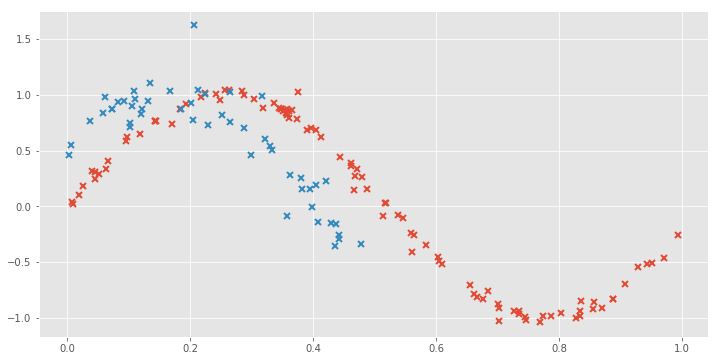

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(X1, Y1, 'x', mew=2)
plt.plot(X2, Y2, 'x', mew=2)
#plt.ylim(-2, 2)

In [19]:
coreg1.kappa.fixed

False

In [47]:
# build a variational model
lik = gpflow.likelihoods.SwitchedLikelihood([gpflow.likelihoods.StudentT(), gpflow.likelihoods.StudentT()])
k1 = gpflow.kernels.Matern32(1)
k2 = gpflow.kernels.Linear(1)
coreg = gpflow.kernels.Coregion(1, output_dim=2, rank=1, active_dims=[1])
# coreg1 = gpflow.kernels.Coregion(1, output_dim=2, rank=1, active_dims=[1])
# coreg2 = gpflow.kernels.Coregion(1, output_dim=2, rank=1, active_dims=[1])
# coreg1.kappa = np.array([1,0])
# coreg1.kappa.fixed = True
# coreg2.kappa = np.array([0,1])
# coreg2.kappa.fixed = True
# kern = (k1 * coreg1) + (k2 * coreg2)
kern = k1 * coreg
X_augmented = np.vstack((np.hstack((X1, np.zeros_like(X1))), np.hstack((X2, np.ones_like(X2)))))
Y_augmented = np.vstack((np.hstack((Y1, np.zeros_like(X1))), np.hstack((Y2, np.ones_like(X2)))))

Z_test = np.ones_like(X_augmented[::3])
Z_test[0,1]=0
#m = gpflow.vgp.VGP(X_augmented, Y_augmented, kern=kern, likelihood=lik, num_latent=1)
m = gpflow.svgp.SVGP(X_augmented, Y_augmented,
                     kern=kern, likelihood=lik, num_latent=1,
                     Z=Z_test)

In [54]:
kern.nam

AttributeError: can't set attribute

In [48]:
Z_test

array([[ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [39]:
init = X_augmented[::3].copy()[:,-1]

In [40]:
_ = m.optimize(max_iters=500)


/home/aboustati/anaconda3/envs/gp-env/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:95: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/aboustati/anaconda3/envs/gp-env/lib/python3.6/site-packages/gpflow/model.py:317: VisibleDeprecationWarning: Use `maxiter` instead of deprecated `max_iters`.
  warnings.warn("Use `maxiter` instead of deprecated `max_iters`.", np.VisibleDeprecationWarning)


In [41]:
kern.prod_1.coregion.kappa.value

AttributeError: 'Prod' object has no attribute 'prod_1'

(-2, 2)

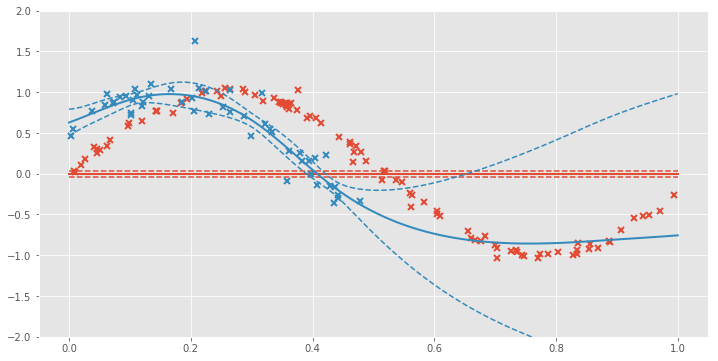

In [42]:
plt.figure(figsize=(12, 6))
xtest = np.linspace(0, 1, 100)[:,None]
line, = plt.plot(X1, Y1, 'x', mew=2)
mu, var = m.predict_f(np.hstack((xtest, np.zeros_like(xtest))))
plt.plot(xtest, mu, color=line.get_color(), lw=2)
plt.plot(xtest, mu + 2*np.sqrt(var), '--', color=line.get_color())
plt.plot(xtest, mu - 2*np.sqrt(var), '--', color=line.get_color())

line, = plt.plot(X2, Y2, 'x', mew=2)
mu, var = m.predict_f(np.hstack((xtest, np.ones_like(xtest))))
plt.plot(xtest, mu, color=line.get_color(), lw=2)
plt.plot(xtest, mu + 2*np.sqrt(var), '--', color=line.get_color())
plt.plot(xtest, mu - 2*np.sqrt(var), '--', color=line.get_color())

plt.ylim(-2, 2)

In [49]:
m.kern.coregion.W = np.random.randn(2, 1)

In [50]:
m.optimize()

/home/aboustati/anaconda3/envs/gp-env/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:95: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


      fun: -82.330614361206898
 hess_inv: <1433x1433 LbfgsInvHessProduct with dtype=float64>
      jac: array([  4.35889105e+00,  -0.00000000e+00,   5.46621534e+00, ...,
        -8.66054576e-08,  -8.32006174e-08,  -1.48536550e-07])
  message: b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
     nfev: 1121
      nit: 1001
   status: 1
  success: False
        x: array([  1.52207279e-01,   0.00000000e+00,   2.43789178e-02, ...,
        -8.78889772e-08,  -8.44589835e-08,   9.99999925e-01])

In [51]:
m.Z.value

array([[ 0.15220728,  0.        ],
       [ 0.02437892,  1.        ],
       [ 0.45738408,  1.        ],
       [ 1.40899398,  1.        ],
       [ 1.40439559,  1.        ],
       [ 0.57788006,  1.        ],
       [ 0.34549148,  1.        ],
       [ 0.84261539,  1.        ],
       [ 0.93768157,  1.        ],
       [ 1.13441819,  1.        ],
       [ 0.96221658,  1.        ],
       [ 0.71653877,  1.        ],
       [ 1.0327637 ,  1.        ],
       [ 1.01350411,  1.        ],
       [ 1.01403868,  1.        ],
       [ 0.97824017,  1.        ],
       [ 1.00425165,  1.        ],
       [ 1.00065369,  1.        ],
       [ 0.99694751,  1.        ],
       [ 0.99322044,  1.        ],
       [ 0.99239659,  1.        ],
       [ 0.99267261,  1.        ],
       [ 0.99324516,  1.        ],
       [ 0.99418287,  1.        ],
       [ 0.99508691,  1.        ],
       [ 0.99579006,  1.        ],
       [ 0.9963134 ,  1.        ],
       [ 0.99670556,  1.        ],
       [ 0.99700387,

In [37]:
(m.Z.value-X_augmented[::3].copy())

1.1537470859933801

(-2, 2)

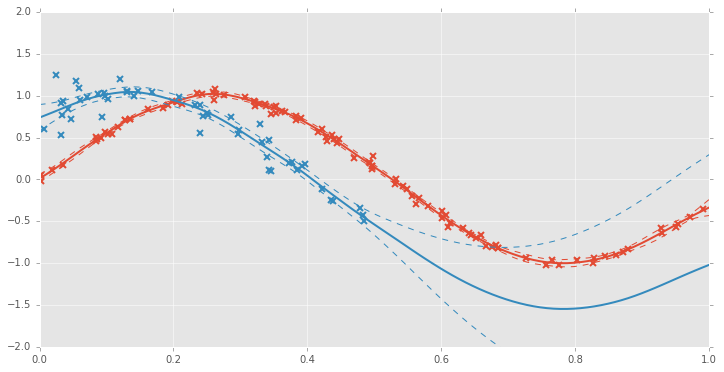

In [28]:
plt.figure(figsize=(12, 6))
xtest = np.linspace(0, 1, 100)[:,None]
line, = plt.plot(X1, Y1, 'x', mew=2)
mu, var = m.predict_f(np.hstack((xtest, np.zeros_like(xtest))))
plt.plot(xtest, mu, color=line.get_color(), lw=2)
plt.plot(xtest, mu + 2*np.sqrt(var), '--', color=line.get_color())
plt.plot(xtest, mu - 2*np.sqrt(var), '--', color=line.get_color())

line, = plt.plot(X2, Y2, 'x', mew=2)
mu, var = m.predict_f(np.hstack((xtest, np.ones_like(xtest))))
plt.plot(xtest, mu, color=line.get_color(), lw=2)
plt.plot(xtest, mu + 2*np.sqrt(var), '--', color=line.get_color())
plt.plot(xtest, mu - 2*np.sqrt(var), '--', color=line.get_color())

plt.ylim(-2, 2)

In [29]:
m.kern

Name,values,prior,constraint
kern.matern32.variance,[ 0.76139805],None,+ve
kern.matern32.lengthscales,[ 0.89748703],None,+ve
kern.coregion.W,[[-1.50611611] [-1.33370778]],None,(none)
kern.coregion.kappa,[ 0.55070398 1.22935634],None,+ve
